## Import required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Load a dataset

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/goradbj/datascience/master/carprices_tr_tst_ex1.csv")

In [8]:
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


## Divide the dataset into input and output

#### input columns/feature = X, output column/feature = Y

In [18]:
X=df[["Mileage","Age(yrs)"]]

In [19]:
X.shape

(20, 2)

In [20]:
X.columns

Index(['Mileage', 'Age(yrs)'], dtype='object')

In [22]:
Y=df[["Sell Price($)"]]

In [23]:
Y.head()

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500


## Divide dataset into Train and Test

In [17]:
from sklearn.model_selection import train_test_split

### train = 80% , test = 20%

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [28]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20, 3)
(16, 2)
(4, 2)
(16, 1)
(4, 1)


## Create Linear Regression Model

#### Cpmodel means car price prediction model and we are creating object 

In [30]:
cpmodel = linear_model.LinearRegression()

#### Now we are training the model using fit()

In [31]:
cpmodel.fit(X_train,Y_train)

LinearRegression()

#### Now we are predicting/testing the model using predict() 

In [33]:
y_pred=cpmodel.predict(X_test)

In [34]:
y_pred

array([[25987.17319696],
       [16524.002328  ],
       [22204.51576467],
       [30118.06108877]])

In [35]:
Y_test

,Sell Price($)
2,26100
14,19400
9,22000
4,31500


In [36]:
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [37]:
cpmodel.coef_

array([[  -0.34823046, -300.35283712]])

In [38]:
cpmodel.intercept_

array([47338.07357504])

In [39]:

print('Coefficients: \n', cpmodel.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test,y_pred))
# The mean absolute error
print('Mean Absolute Error: %2f'
      % mean_absolute_error(Y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, y_pred))

Coefficients: 
 [[  -0.34823046 -300.35283712]]
Mean squared error: 2558918.59
Mean Absolute Error: 1143.819788
Coefficient of determination: 0.88


#### We have two values for coefficients that is m1 and m2 and our model is 88% accurate(coefficient of determination) and above code is same as bellow

In [40]:
mae = mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test,y_pred)

print(mae)
print(mse)
print(rmse)
print(r2)

1143.8197877349266
2558918.587298561
1599.6620228343738
0.877519751714799


#### Now i am pridicting/testing the model with some raw input mileage=59000 ,age=5

In [41]:
cpmodel.predict([[59000,5]])

array([[25290.71227792]])

#### Error is comming beacause x has two column and y has only one column (column must be same)

ValueError: x and y must be the same size

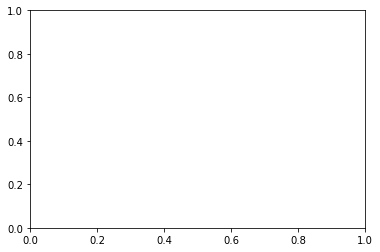

In [42]:
plt.scatter(X_test, Y_test,  color='black')

##plot means line of regression
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

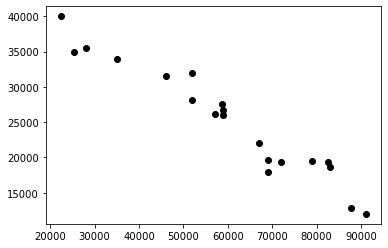

In [48]:

plt.scatter(df["Mileage"],df["Sell Price($)"],color='black')
plt.show()

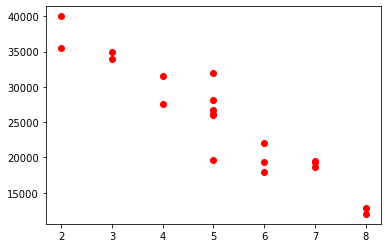

In [49]:
plt.scatter(df["Age(yrs)"],df["Sell Price($)"],color='red')
plt.show()